In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

In [4]:
print(np.finfo(np.float128))

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1.0000000000000000715e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
---------------------------------------------------------------



In [5]:
a = 0 
b = 0.25*np.pi

f = lambda x: np.sin(x)

In [6]:
# INTEGRAL EXACTA
I = -np.cos(b) + np.cos(a)
I

0.2928932188134524

In [15]:
n = 5
# 
Roots1, Weights1 = np.polynomial.legendre.leggauss(n)

Roots1, Weights1

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))

$\int_a^b f(x) = \frac{1}{2}(b-a)\sum_{k=0}^n \omega_k f\left(\frac{1}{2}[t_k(b-a)+a+b])$

In [16]:
# INTEGRAL APROXIMADA
t1 = 0.5*((b-a)*Roots1 + a + b)
Integral1 = 0.5*(b-a)*np.sum(Weights1*f(t1))

Integral1

0.292893218813463

In [17]:
x = sym.Symbol('x', real = True)
y = sym.Symbol('y', real = True)

In [18]:
def GetLegendre(n, x, y):
    # donde n es el grado del polinomio
    y = (x**2 - 1)**n
    poly = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
    return poly

In [19]:
Legendre = []
DLegendre = []

#sacar n polinomios de legendre (en este caso se definió n=8)
for i in range(n+1):
    Poly = GetLegendre(i, x, y)
    Legendre.append(Poly)
    DLegendre.append(sym.diff(Poly,x,1))

In [20]:
DLegendre

[0,
 1,
 3*x,
 15*x**2/2 - 3/2,
 10*x**3 + 15*x*(x**2 - 1)/2,
 x**4 + 5*x**2*(x**2 - 1) + x*(112*x**3 + 140*x*(x**2 - 1))/8 + 15*(x**2 - 1)**2/8]

<function matplotlib.pyplot.show(close=None, block=None)>

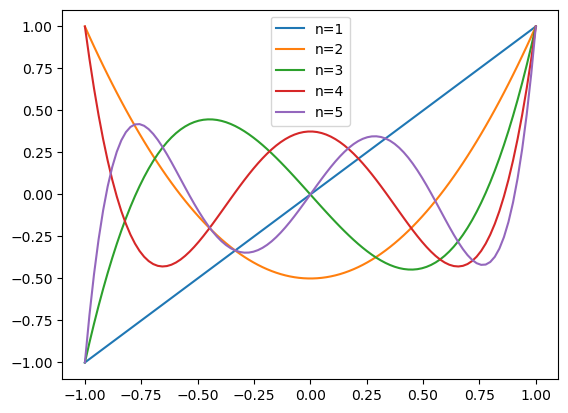

In [21]:
_x = np.linspace(-1, 1, 100)

for i, p in enumerate(Legendre):
    if i!=0:
        pn = sym.lambdify([x], p , 'numpy')
        lbel = str(i)
        plt.plot(_x, pn(_x), label= 'n='+lbel )
        
plt.legend()
plt.show

In [14]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        
        try:
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        root = GetNewton(f,df,i)
        
        if root != False:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRoots(n,xn,Legendre,DLegendre):
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [61]:
# Scan
xn = np.linspace(-1,1,100)
Roots = GetAllRoots(n,xn,Legendre,DLegendre)

In [62]:
for i in range(len(Roots)):
    print(Roots[i],Roots1[i])

-0.96028985649754 -0.9602898564975362
-0.79666647741363 -0.7966664774136267
-0.52553240991633 -0.525532409916329
-0.18343464249565 -0.18343464249564978
0.18343464249565 0.18343464249564978
0.52553240991633 0.525532409916329
0.79666647741363 0.7966664774136267
0.96028985649754 0.9602898564975362


In [63]:
def GetWeights(Roots,DLegendre):
    
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Weights= 2/( (1-Roots**2)*Dpoly(Roots)**2 )
    
    return Weights

In [64]:
Weights = GetWeights(Roots,DLegendre)

In [65]:
for i in range(len(Roots)):
    print(Weights[i],Weights1[i])

0.10122853629036697 0.10122853629037669
0.22238103445337154 0.22238103445337434
0.31370664587788705 0.31370664587788705
0.362683783378362 0.36268378337836177
0.362683783378362 0.36268378337836177
0.31370664587788705 0.31370664587788705
0.22238103445337154 0.22238103445337434
0.10122853629036697 0.10122853629037669


In [67]:
integrate.quad(f,a,b)

(0.2928932188134524, 3.2517679528326894e-15)